# Experimentación

In [2]:
import pandas as pd
from junifer.storage import HDF5FeatureStorage
import julearn
from julearn import run_cross_validation
from julearn import PipelineCreator
from julearn.utils import configure_logging

from sklearn.model_selection import RepeatedKFold

configure_logging(level="INFO")

2024-06-05 12:50:59,034 - julearn - INFO - ===== Lib Versions =====
2024-06-05 12:50:59,037 - julearn - INFO - numpy: 1.26.4
2024-06-05 12:50:59,039 - julearn - INFO - scipy: 1.11.4
2024-06-05 12:50:59,041 - julearn - INFO - sklearn: 1.3.2
2024-06-05 12:50:59,112 - julearn - INFO - pandas: 2.2.2
2024-06-05 12:50:59,122 - julearn - INFO - julearn: 0.3.1
2024-06-05 12:50:59,126 - julearn - INFO - ========================


In [3]:
storage = HDF5FeatureStorage("./features/ds003097_GMD/ds003097_GMD.hdf5")

In [7]:
storage.list_features()

{'881ac4e46fc343c867f102ceb674fdff': {'datagrabber': {'class': 'PatternDataladDataGrabber',
   'patterns': {'VBM_GM': {'pattern': 'derivatives/fmriprep/{subject}/anat/{subject}_space-MNI152NLin2009cAsym_label-GM_probseg.nii.gz',
     'space': 'MNI152NLin2009cAsym'}},
   'replacements': ['subject'],
   'confounds_format': None,
   'types': ['VBM_GM'],
   'uri': 'https://github.com/OpenNeuroDatasets/ds003097.git',
   'datalad_dirty': False,
   'datalad_commit_id': '47f030747dbaf492acd9f9624528aef8d51d8bd9',
   'datalad_id': 'aefe5438-e93b-11ea-ad4c-8e2245da6db7'},
  'dependencies': {'nilearn': '0.10.2', 'numpy': '1.26.4'},
  'datareader': {'class': 'DefaultDataReader'},
  'type': 'VBM_GM',
  'marker': {'class': 'ParcelAggregation',
   'parcellation': ['Schaefer400x7'],
   'method': 'mean',
   'method_params': {},
   'masks': None,
   'name': 'Schaefer400x7_Mean',
   'time_method': None,
   'time_method_params': {}},
  '_element_keys': ['subject'],
  'name': 'VBM_GM_Schaefer400x7_Mean'},


In [4]:
# df =storage.read_df("VBM_GM_Shen_2019_368_Mean")
df = storage.read_df("VBM_GM_Schaefer400x7_Mean")

In [5]:
df_demografics = pd.read_csv("./data/participants.tsv", sep="\t")
df_demografics.rename(columns={"participant_id": "subject"}, inplace=True)

In [6]:
df.columns = df.columns.astype("str")
X = list(df.columns)
df_full = df.merge(df_demografics, on="subject")
df_full.dropna(inplace=True, subset=['IST_fluid', 'IST_memory', 'IST_crystallised', 'IST_intelligence_total'])
targets = ["IST_fluid", "IST_crystallised", "IST_memory"]

Separamos 10% de los datos para validación antes de entrenar los modelos

In [16]:
df_full.shape

(928, 431)

In [17]:
df_holdout = df_full.sample(frac=0.1)
df_holdout

,subject,LH_Vis_1,LH_Vis_2,LH_Vis_3,LH_Vis_4,LH_Vis_5,LH_Vis_6,LH_Vis_7,LH_Vis_8,LH_Vis_9,...,sexual_attraction_M,sexual_attraction_F,gender_identity_M,gender_identity_F,religious_upbringing,religious_now,religious_importance,DWI_TR_run1,DWI_TR_run2,DWI_TR_run3
877,sub-0518,0.649868,0.602648,0.579586,0.564849,0.555825,0.448850,0.421708,0.436335,0.499547,...,7.0,1.0,1.0,7.0,no,no,NaN,6.311,6.311,NaN
622,sub-0307,0.624538,0.644325,0.555527,0.532697,0.509746,0.492005,0.417710,0.443771,0.462225,...,7.0,1.0,1.0,7.0,no,no,NaN,6.311,6.311,6.311
783,sub-0283,0.641095,0.546079,0.566505,0.523167,0.469843,0.456674,0.395119,0.451619,0.437352,...,NaN,NaN,NaN,NaN,yes,yes,5.0,6.311,6.311,6.311
418,sub-0898,0.706858,0.586046,0.635263,0.618814,0.482445,0.519630,0.515587,0.437627,0.501720,...,NaN,NaN,NaN,NaN,no,yes,5.0,6.312,6.312,6.312
715,sub-0723,0.599295,0.579040,0.520944,0.497863,0.456258,0.472976,0.482397,0.434101,0.391664,...,1.0,7.0,6.0,1.0,yes,no,NaN,6.311,6.311,6.311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
757,sub-0288,0.670483,0.590384,0.608347,0.566409,0.543133,0.421940,0.495001,0.443623,0.445588,...,7.0,1.0,1.0,1.0,no,no,NaN,6.311,6.311,6.311
31,sub-0233,0.594914,0.572583,0.554619,0.615570,0.485290,0.458292,0.463419,0.392570,0.463213,...,1.0,7.0,7.0,1.0,yes,no,NaN,6.311,6.311,6.311
625,sub-0434,0.630569,0.570091,0.644724,0.635207,0.498687,0.494323,0.467136,0.482453,0.513199,...,7.0,1.0,1.0,7.0,no,no,NaN,6.374,6.374,6.374
58,sub-0849,0.651502,0.646008,0.581427,0.609677,0.547479,0.475025,0.490809,0.448010,0.442797,...,NaN,NaN,NaN,NaN,yes,yes,5.0,6.312,6.312,6.312


In [24]:
# separate holdset from training set
df_full.drop(df_holdout.index, inplace=True)
df_full.shape

(835, 431)

### Correlación entre los targets

<Axes: >

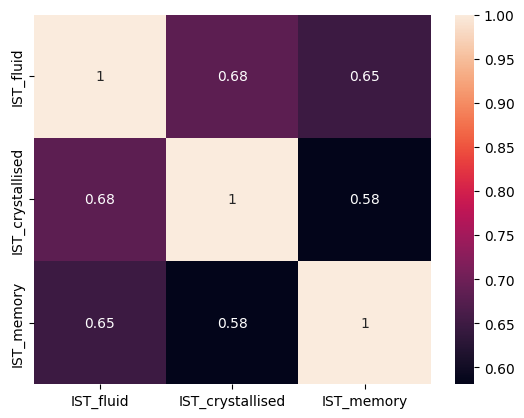

In [7]:
#correlation map of the 3 features to predict. IST_fluid, IST_crystallised, IST_memory
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_full[targets].corr(), annot=True)

<Figure size 1000x1000 with 0 Axes>

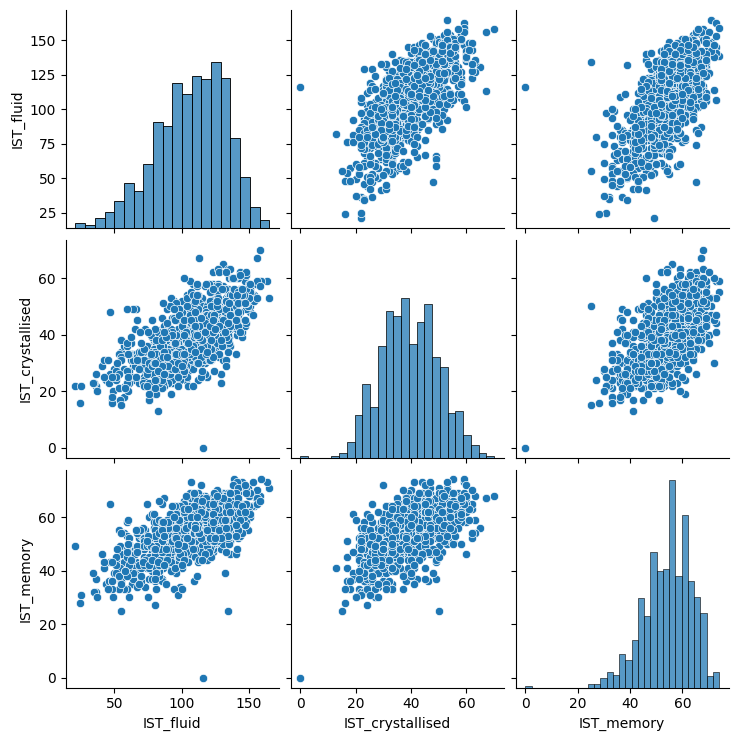

In [26]:
# Pairplot of the 3 features to predict. Correlation and distribution of the targets
sns.pairplot(df_full[["IST_fluid", "IST_crystallised", "IST_memory"]])

### Entrenamiento

In [13]:
cv = RepeatedKFold(n_splits=3, n_repeats=10, random_state=42)

In [16]:
search_params = {
    "kind": "bayes",
    "n_iter": 50,
}

# Model 1 (SVM)
creator1 = PipelineCreator(problem_type="regression")
creator1.add("zscore")
creator1.add("svm",
             kernel="linear",
             C=(1e-6, 1, "log-uniform"),
             epsilon=(0.01, 3, "uniform")
            )

creator2 = PipelineCreator(problem_type="regression")
creator2.add("zscore")
creator2.add("svm", 
             kernel=["rbf", "sigmoid"],
             C=(1e-6, 1, "log-uniform"),
             gamma=[1e-5, 1e-4, 1e-3, 1e-2, "scale", "auto"],
             epsilon=(0.01, 3, "uniform")
            )

# Model 2 (Random Forest)
creator3 = PipelineCreator(problem_type="regression")
creator3.add("zscore")
creator3.add("rf", n_estimators=[25, 50, 100], max_depth=[5, 10, 20])

# Model 3 (Gradient Boosting)
creatorXG = PipelineCreator(problem_type="regression")
creatorXG.add("zscore")
creatorXG.add("gradientboost", n_estimators=[25, 50, 100], max_depth=[3, 5, 10], random_state=42)

# Model 4 (Dummy)
dummy_creator = PipelineCreator(problem_type="regression")
dummy_creator.add("zscore")
dummy_creator.add("dummy")

2024-06-04 13:51:44,574 - julearn - INFO - Adding step zscore that applies to ColumnTypes<types={'continuous'}; pattern=(?:__:type:__continuous)>


2024-06-04 13:51:44,597 - julearn - INFO - Step added
2024-06-04 13:51:44,613 - julearn - INFO - Adding step svm that applies to ColumnTypes<types={'continuous'}; pattern=(?:__:type:__continuous)>
2024-06-04 13:51:44,615 - julearn - INFO - Setting hyperparameter kernel = linear
2024-06-04 13:51:44,617 - julearn - INFO - Tuning hyperparameter C = (1e-06, 1, 'log-uniform')
2024-06-04 13:51:44,619 - julearn - INFO - Tuning hyperparameter gamma = [1e-05, 0.0001, 0.001, 0.01, 'scale', 'auto']
2024-06-04 13:51:44,621 - julearn - INFO - Tuning hyperparameter epsilon = (0.01, 3, 'uniform')
2024-06-04 13:51:44,626 - julearn - INFO - Step added
2024-06-04 13:51:44,628 - julearn - INFO - Adding step zscore that applies to ColumnTypes<types={'continuous'}; pattern=(?:__:type:__continuous)>
2024-06-04 13:51:44,630 - julearn - INFO - Step added
2024-06-04 13:51:44,633 - julearn - INFO - Adding step svm that applies to ColumnTypes<types={'continuous'}; pattern=(?:__:type:__continuous)>
2024-06-04 13:

In [10]:
scores_dict = {t: {} for t in targets}
model_dict = {t: {} for t in targets}
inspector_dict = {t: {} for t in targets}

models = {'SVM': [creator1, creator2], 'RF': creator3, 'XGBoost': creatorXG, 'Dummy': dummy_creator}

### Visualización

In [ ]:
from julearn.viz import plot_scores

In [ ]:
for y in targets:
    for m_name, m in models.items():
        scores, model, inspector = run_cross_validation(
            X=X,
            y=y,
            data=df_full,
            model= m,
            return_train_score=True,
            return_inspector=True,
            cv=cv,
            scoring="neg_mean_absolute_error",
        )
        scores['model'] = m_name
        scores_dict[y][m_name] = scores
        model_dict[y][m_name] = model
        inspector_dict[y][m_name] = inspector

In [18]:
for y in targets:
    for est in scores_dict[y]['SVM'].estimator:
        print("=================== " + y + " ======================")
        display(est.best_params_)

{'set_column_types': SetColumnTypes(X_types={}),
 'svm': SVR(),
 'svm__C': 1,
 'svm__epsilon': 0.01,
 'svm__gamma': 'auto',
 'svm__kernel': 'sigmoid',
 'zscore': StandardScaler()}

{'set_column_types': SetColumnTypes(X_types={}),
 'svm': SVR(),
 'svm__C': 1,
 'svm__epsilon': 3,
 'svm__gamma': 'auto',
 'svm__kernel': 'sigmoid',
 'zscore': StandardScaler()}

{'set_column_types': SetColumnTypes(X_types={}),
 'svm': SVR(),
 'svm__C': 1,
 'svm__epsilon': 0.01,
 'svm__gamma': 'scale',
 'svm__kernel': 'sigmoid',
 'zscore': StandardScaler()}

{'set_column_types': SetColumnTypes(X_types={}),
 'svm': SVR(),
 'svm__C': 1,
 'svm__epsilon': 3,
 'svm__gamma': 'auto',
 'svm__kernel': 'sigmoid',
 'zscore': StandardScaler()}

{'set_column_types': SetColumnTypes(X_types={}),
 'svm': SVR(),
 'svm__C': 1,
 'svm__epsilon': 3,
 'svm__gamma': 'auto',
 'svm__kernel': 'sigmoid',
 'zscore': StandardScaler()}

In [ ]:
for y in targets:
    holdout_pred1, holdout_pred2, holdout_pred3, holdout_pred4 = tuple(model_dict[y][m].predict(df_holdout[X]) for m in models)
    s1, s2, s3, s4 = tuple(scores_dict[y].values())
    panel = plot_scores(s1, s2, s3, s4)
    
    panel.show()

In [ ]:
# correlation scatter plot for the best model, predict vs ground truth
fig, ax = plt.subplots((2, 2), figsize=(10, 10))

for i, m_name in enumerate(models):
    y_true = df_holdout['IST_intelligence_total']
    y_pred_fluid = model_dict['IST_fluid'][m_name].predict(df_holdout[X])
    y_pred_memory = model_dict['IST_memory'][m_name].predict(df_holdout[X])
    y_pred_crystallised = model_dict['IST_crystallised'][m_name].predict(df_holdout[X])

    y_pred = y_pred_fluid + y_pred_memory + y_pred_crystallised

    ax[i//2][i%2] = sns.scatterplot(x=y_true, y=y_pred, alpha=0.5)
    ax[i//2][i%2].set_title(f"IST_intelligence_total vs {m_name} prediction")
    ax[i//2][i%2].set_xlabel("IST_intelligence_total")
    ax[i//2][i%2].set_ylabel("Prediction")
    ax[i//2][i%2].plot([0, 1], [0, 1], transform=ax[i//2][i%2].transAxes, color='red', linestyle='--')
    

In [ ]:
# from bokeh.plotting import figure, output_file, show

# # output to static HTML file
# output_file("line.html")

# p = figure(width=400, height=400)

# # add a circle renderer with a size, color, and alpha
# p.circle([1, 2, 3, 4, 5], [6, 7, 2, 4, 5], size=20, color="navy", alpha=0.5)

# # show the results
# show(p)